# 3) Functions

 1. Using Julia  
 2. Introduction to floating point arithmetic   
     2.1. Plotting    
 3. Machine Epsilon

# 1. Julia

To recap from first class, Julia is a relatively new programming language. Think of it as MATLAB done right, open source, and fast. It's nominally general-purpose, but mostly for numerical/scientific/statistical computing. There are great [learning resources](https://julialang.org/learning/). We'll introduce concepts and language features as we go.

In [ ]:
# The last line of a cell is output by default
x = 3
y = 4

In [ ]:
println("$x + $y = $(x + y)") # string formatting/interpolation
4;  # trailing semicolon suppresses output

In [ ]:
@show x + y
x * y

## 1.1. Numbers

:::{tip}
Check this very helpful [Julia documentation page](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/).
:::

In [ ]:
3, 3.0, 3.0f0, big(3.0) # integers, double precision, single precision, and convert to a maximum precision representation

In [ ]:
typeof(3), typeof(3.0), typeof(3.0f0), typeof(big(3.0))

In [ ]:
# automatic promotion
@show 3 + 3.0
@show 3.0 + 3.0f0
@show 3 + 3.0f0;

In [ ]:
# floating and integer division
@show 4 / 2
@show -3 ÷ 2; # type `\div` and press TAB

## 1.2 Arrays

In [ ]:
[1, 2, 3]

In [ ]:
# explicit typing
Float64[1,2,3]

In [ ]:
# promotion rules similar to arithmetic
[1,2,3.] + [1,2,3]

In [ ]:
x = [10., 20, 30]
x[2] # one-based indexing

In [ ]:
x[2] = 3.5

In [ ]:
# multi-dimensional array
A = [10 20 30; 40 50 60]

Compare with the Python notation:

```python
A = np.array([[10, 20, 30], [40, 50, 60]])
```

## 1.3 Functions

In [1]:
# define a function called 'f' that takes three arguments, one of which has a default value
function f(x, y; z=3)
    sqrt(x*x + y*y) + z
end

# define another function also called 'f' that only takes two arguments
function f(x, y)
    sqrt(x*x + y*y)
end

f (generic function with 1 method)

What is the difference between a **method** and a **function** in Julia? Check this [resource](https://docs.julialang.org/en/v1/manual/methods/).

In [2]:
# if I invoke f this way, which one will the Julia compiler use?
f(3, 4, z=5)

10.0

In [3]:
# if instead I invoke f this way, which one will the Julia compiler use?
f(2, 3)

3.605551275463989

In [ ]:
g(x, y) = sqrt(x^2 + y^2)
g(3, 4)

We have just seen an example of one of the most powerful features of Julia: **dynamic [(multiple) dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch)**: 

- Functions can have multiple definitions as long each definition restricts the type of the parameters differently. It is the type of the parameters that define which "definition" (or "method" in Julia terminology) will be called. 

- This is the way Julia mimics [polymorphism](https://en.wikipedia.org/wiki/Polymorphism_(computer_science)) that some compiled languages (e.g., C++) have.

**Anonymous functions** are usually functions so short-lived that they do not need a name. This is done with an arrow notation. Example:

In [4]:
((x, y) -> sqrt(x^2 + y^2))(3, 4)

5.0

## 1.4 Loops

In [5]:
# ranges
1:50000000

1:50000000

In [6]:
collect(1:5)

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [7]:
x = 0
for n in 1:50000000
    x += 1/n^2
end
@show x
x - pi^2/6 # Basel problem (solved by Euler; generalized by Riemann's zeta function)

x = 1.6449340467988642


-2.0049362170482254e-8

In [8]:
# list comprehensions
sum([1/n^2 for n in 1:1000])

1.6439345666815612

# 2. Floating point arithmetic

In [9]:
0.1 + 0.2
(1 + 1.2e-16) - 1

2.220446049250313e-16

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


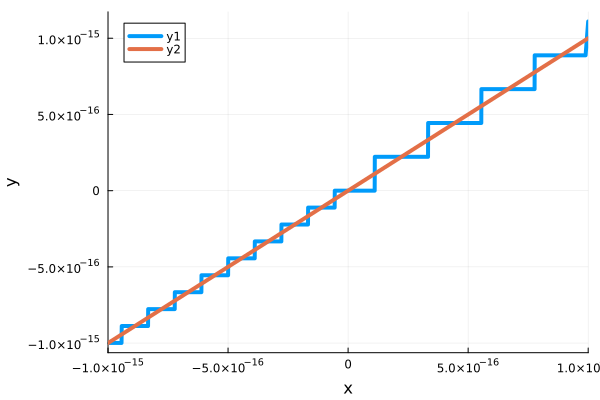

In [12]:
using Pkg
Pkg.add("Plots")

using Plots
default(linewidth=4)
plot(x -> (1 + x) - 1, xlims=(-1e-15, 1e-15),
xlabel="x", ylabel="y")
plot!(x -> x)

# 3. Machine epsilon

We approximate real numbers with **floating point** arithmetic, which can only represent discrete values. In particular, there exists a largest number, which we call $\epsilon_{\text{machine}}$, such that
$$ 1 \oplus x = 1 \quad \text{for all}\  \lvert x \rvert < \epsilon_{\text{machine}}.$$

The notation $\oplus, \ominus, \odot, \oslash$ represent the elementary operation carried out in floating point arithmetic.

In [13]:
eps = 1
while 1 + eps != 1
    eps = eps / 2
end
eps

1.1102230246251565e-16

In [14]:
eps = 1.f0
while 1 + eps != 1
    eps = eps / 2
end
eps

5.9604645f-8

## 3.1 Approximating `exp`

$$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dotsb$$

Suppose we want to compute $f(x) = e^x - 1$ for small values of $x$.

In [15]:
f1(x) = exp(x) - 1
y1 = f1(1e-8)

9.99999993922529e-9

In [16]:
f2(x) = x + x^2/2 + x^3/6
y2 = f2(1e-8)

1.000000005e-8

Which answer is more accurate?

In [17]:
@show (y1 - y2)        # Absolute difference
@show (y1 - y2) / y2;  # Relative difference

y1 - y2 = -1.1077470910720506e-16
(y1 - y2) / y2 = -1.1077470855333152e-8


In [18]:
0 / 0

NaN